### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [23]:
# import requests and json
import requests
import json

# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "8F8TTqt4xiq1zWDQORIz0vqMEf3QQQJl"
offset = str(0)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=8F8TTqt4xiq1zWDQORIz0vqMEf3QQQJl&offset=1&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [24]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [25]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1606253129',
  'comments': [{'commentID': 107564884,
    'status': 'approved',
    'commentSequence': 107564884,
    'userID': 11023059,
    'userDisplayName': 'Vicki From Vermont',
    'userLocation': 'Vermont',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': 'Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has

In [36]:
# isolate just the comments dictionary
comnt_inf = data['results']['comments']
comnt_inf

[{'commentID': 107564884,
  'status': 'approved',
  'commentSequence': 107564884,
  'userID': 11023059,
  'userDisplayName': 'Vicki From Vermont',
  'userLocation': 'Vermont',
  'userTitle': 'NULL',
  'userURL': 'NULL',
  'picURL': None,
  'commentTitle': '<br\\//>',
  'commentBody': 'Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has perpetuated white supremacy ideology, mass incarceration, organized housing and employment discrimination and much evil. Historically the US has called on its fellow citizens of color to defend it in two world wars, the Vietnam war and more only to

In [37]:
#define comments
comments= [sub['commentBody'] for sub in comnt_inf]
comments

['Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. \nI do not believe we should be honoring the side of the war that brought us to it, and has perpetuated white supremacy ideology, mass incarceration, organized housing and employment discrimination and much evil. Historically the US has called on its fellow citizens of color to defend it in two world wars, the Vietnam war and more only to bring them to bases named after Civil War people whose ideology would place them as disposable second class citizens. It is all Shameful. We should not erect monuments to those who warred against the United States and worked for its destruction.',
 'In the outskirts of the city of B

In [38]:
# look at just one of the comments
specific_comment = comments [15] 
print (specific_comment)

"We cannot be a free and equal democracy and a country of inequality, unaccountable police violence and Trumpist exclusion. We will have to be either one or the other. The protests represent millions of Americans announcing their allegiance to the former. It remains to be seen whether that brings a reaction of similar scope in defense of the latter."

Black Lives Matter.  Absolutely.  I wholeheartedly endorse this cause.  I fervently support it.  But we need to acknowledge that it comes with a price.  The price is that all black voters must turn out on Election Day, and they must vote down Trump and his political enablers.  This is simply a non-negotiable.  White voters cannot be expected to pick up the slack.  And they will not.

If the vast majority of African-American voters turn out in light of George Floyd and Black Lives Matter *and* the vast majority of Latino voters turn out in light of Puerto Rico, DACA and children in cages at the border, then *just that* will be enough to so

In [59]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this
text_low = specific_comment.lower()
text_nopunct = text_low.replace(',','').replace('.','').replace('"','').replace('-','').replace('*','').replace('?','').replace('“','').replace(':','').replace('’','')
print(text_nopunct)

we cannot be a free and equal democracy and a country of inequality unaccountable police violence and trumpist exclusion we will have to be either one or the other the protests represent millions of americans announcing their allegiance to the former it remains to be seen whether that brings a reaction of similar scope in defense of the latter

black lives matter  absolutely  i wholeheartedly endorse this cause  i fervently support it  but we need to acknowledge that it comes with a price  the price is that all black voters must turn out on election day and they must vote down trump and his political enablers  this is simply a nonnegotiable  white voters cannot be expected to pick up the slack  and they will not

if the vast majority of africanamerican voters turn out in light of george floyd and black lives matter and the vast majority of latino voters turn out in light of puerto rico daca and children in cages at the border then just that will be enough to soundly defeat trump in nov

In [60]:
# split text into list
text_data = text_nopunct.split()

# create a dictionary of word frequencies!
word_frequencies = {}

# go through each word in text_data
for word in text_data:
    # if the word isn't in the dictionary, add it as a key AND give it a value of 1
    if word not in word_frequencies.keys():
        word_frequencies[word] = 1
    # if the word IS in the dictionary, add 1 to the value
    else:
        word_frequencies[word] += 1
print(word_frequencies)

{'we': 5, 'cannot': 2, 'be': 5, 'a': 5, 'free': 1, 'and': 11, 'equal': 1, 'democracy': 1, 'country': 1, 'of': 10, 'inequality': 1, 'unaccountable': 1, 'police': 1, 'violence': 1, 'trumpist': 1, 'exclusion': 1, 'will': 3, 'have': 2, 'to': 9, 'either': 1, 'one': 1, 'or': 1, 'the': 14, 'other': 1, 'protests': 1, 'represent': 1, 'millions': 1, 'americans': 1, 'announcing': 1, 'their': 1, 'allegiance': 1, 'former': 1, 'it': 5, 'remains': 1, 'seen': 1, 'whether': 1, 'that': 5, 'brings': 1, 'reaction': 1, 'similar': 1, 'scope': 1, 'in': 8, 'defense': 1, 'latter': 1, 'black': 6, 'lives': 2, 'matter': 2, 'absolutely': 1, 'i': 2, 'wholeheartedly': 1, 'endorse': 1, 'this': 2, 'cause': 1, 'fervently': 1, 'support': 1, 'but': 1, 'need': 1, 'acknowledge': 1, 'comes': 1, 'with': 2, 'price': 2, 'is': 4, 'all': 1, 'voters': 6, 'must': 2, 'turn': 3, 'out': 4, 'on': 1, 'election': 1, 'day': 1, 'they': 2, 'vote': 1, 'down': 1, 'trump': 3, 'his': 2, 'political': 1, 'enablers': 1, 'simply': 1, 'nonnegotiabl

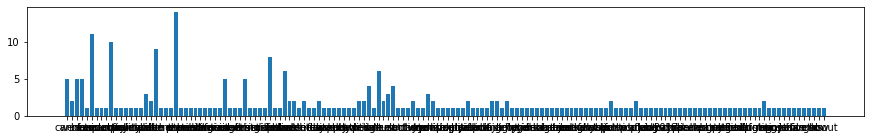

In [65]:
# try and plot out a chart of the dictionary we just created!
import matplotlib.pyplot as plt
keys = word_frequencies.keys()
values = word_frequencies.values()

fig= plt.figure(figsize=(15,2))
plt.bar(keys, values)

plt.show()